**Project description**

This analysis for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. I'll identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

### Imports
Import the packages to use in this project

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.io as pio
pio.renderers.default = "svg"
import seaborn as sns
!pip install squarify
import squarify

### Reading the data

In [2]:
df = pd.read_csv('C:/Users/anna/Desktop/Y-data/Integrated Project/games.csv')

### First view of the data

In [3]:
# Print the table
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

Index(['Name', 'Platform', 'Genre', 'User_Score', 'Rating'], dtype='object')


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [7]:
df.User_Score.apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [8]:
for i in df.columns:
    print(i, len(df[df[i] == 0]))

Name 0
Platform 0
Year_of_Release 0
Genre 0
NA_sales 4508
EU_sales 5870
JP_sales 10514
Other_sales 6601
Critic_Score 0
User_Score 0
Rating 0


In [9]:
df[df['NA_sales'] == 0].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN


In [10]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Conclusion: after the first view of the data I found that:
- Columns Name, Year_of_Release, Critic_Score, User_Score and Rating have NULLs and I will have to decide how to deal with them.
- Sales by regions(NA, EU, JP, Other) contain 0's. This means that some games were sold only in specific regions and not word-wide.
- User_Score contains 2 data types: float and integer. In the next section, I'll fix this.
- Year_of_Release saved in float format. I'll convert this column to integer in order to have a nice view of tables and graphs.


### Step 2. Prepare the data

Replace the column names (make them lowercase)

In [11]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [12]:
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Convert the data to the required types

I'll delete rows with nulls in years and name, as I don't have a valid data to replace the nulls, and % of data affected is minor.

In [13]:
df.dropna(subset=['year_of_release'], inplace=True)
df.dropna(subset=['name'], inplace=True)

Check what is left from missing data.

In [14]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Convert years to integer format.

In [15]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [16]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


In [17]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Check the values in user_score, as this column has 2 issues: integers(tbd) and NULLs.

In [18]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1         2
0.7       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Check % of values in user score and analyse the nature of the ussie.

In [19]:
print(df.user_score.value_counts()/len(df))

tbd    0.144490
7.8    0.019582
8      0.017332
8.2    0.016784
8.3    0.015325
         ...   
1.1    0.000122
1      0.000122
0.7    0.000122
0      0.000061
9.7    0.000061
Name: user_score, Length: 96, dtype: float64


In [20]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [21]:
df[df.user_score == 'tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

The 14% of the user score is "tbd". It also spread for a long previous period, which means that comment "tbd" was set previously and wasn't fixed in time in the dataset. So it's maybe a lost data or data that was never entered. 

If rows with "tbd" were less than 10% of the dataset, I'd drop them. But since they 14% I'll convert them to NULLs and replace them together with all other missing scores.

In [22]:
df['user_score'] = df['user_score'].replace(['tbd'], np.nan)

In [23]:
df['user_score'].value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
1.1      2
1        2
0.7      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

As column user_score had issue with a format, I'll convert it to float.

In [24]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [25]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


For the purpose of filling NULLs in user score I'll iterate  over each row, check for the missing values in score and then use conditions:
1.	the first condition is to take the name of the game, take a subset of the data with this game and check whether there were ratings for other platform. If the condition is met, I'll replase the missing score with the mean of the same game, but on other platforms.
2.	If the condition is not met, then I'll use the average values for each genre and remove NULLs with these values.


In [26]:
print('user score before first round filling nulls:', df.user_score.isna().sum())
print('criric score before first round filling nulls:', df.critic_score.isna().sum())

user score before first round filling nulls: 8981
criric score before first round filling nulls: 8461


Iterating over the first condition.

In [27]:
df['user_score'] = df.groupby('name')['user_score'].apply(lambda x: x.fillna(x.mean()))
df['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16444, dtype: float64

In [28]:
df['critic_score'] = df.groupby('name')['critic_score'].apply(lambda x: x.fillna(x.mean()))
df['critic_score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16444, dtype: float64

Checking how many rows with NULLs are left.

In [29]:
print('user score after first round filling nulls:', df.user_score.isna().sum())
print('critic score after first round filling nulls:', df.critic_score.isna().sum())

user score after first round filling nulls: 7920
critic score after first round filling nulls: 7522


Preparing data with means by genre for boths type of scores for the second condition.

In [30]:
df_group_user = df.groupby('genre')['user_score'].mean()
df_group_user

genre
Action          7.023391
Adventure       7.008759
Fighting        7.279664
Misc            6.762954
Platform        7.234217
Puzzle          7.045775
Racing          7.002402
Role-Playing    7.634799
Shooter         7.033495
Simulation      7.115346
Sports          6.926040
Strategy        7.305521
Name: user_score, dtype: float64

In [31]:
df_group_critic = df.groupby('genre')['critic_score'].mean()
df_group_critic

genre
Action          66.940919
Adventure       64.276423
Fighting        69.421450
Misc            66.286432
Platform        67.386553
Puzzle          67.105263
Racing          67.614040
Role-Playing    73.023928
Shooter         70.040172
Simulation      68.220733
Sports          71.354926
Strategy        71.912829
Name: critic_score, dtype: float64

Iterating over the second condition.

In [32]:
df['user_score'] = df.groupby('genre')['user_score'].apply(lambda x: x.fillna(x.mean()))

In [33]:
df['critic_score'] = df.groupby('genre')['critic_score'].apply(lambda x: x.fillna(x.mean()))

In [34]:
print('user score after second round filling nulls:', df.user_score.isna().sum())
print('critic score after second round filling nulls:', df.critic_score.isna().sum())

user score after second round filling nulls: 0
critic score after second round filling nulls: 0


In [35]:
df['user_score'].value_counts()

7.023391    1239
6.762954    1189
6.926040    1011
7.008759     941
7.634799     683
            ... 
3.750000       1
6.850000       1
5.675000       1
8.533333       1
6.460000       1
Name: user_score, Length: 278, dtype: int64

In [36]:
df['user_score'].round()
df['critic_score'].round()

0        76.0
1        67.0
2        82.0
3        80.0
4        73.0
         ... 
16710    67.0
16711    71.0
16712    64.0
16713    67.0
16714    68.0
Name: critic_score, Length: 16444, dtype: float64

Checking how many rows with NULLs in column rating.

In [37]:
df.rating.isnull().sum()

6676

In [38]:
rating = df[df['rating'].isnull()]
rating['name']

1                    Super Mario Bros.
4             Pokemon Red/Pokemon Blue
5                               Tetris
9                            Duck Hunt
10                          Nintendogs
                     ...              
16710    Samurai Warriors: Sanada Maru
16711                 LMA Manager 2007
16712          Haitaka no Psychedelica
16713                 Spirits & Spells
16714              Winning Post 8 2016
Name: name, Length: 6676, dtype: object

Conclusions:
- I'll not replace the missing data in the rating column, as this may be a time-consuming process. I'll work with the present data.
- I replaced the missing data in score ratings, because the value of NULLs were essential and I had data from other rows, which was used to calculate means.

>Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [39]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,67.386553,7.234217,NaN,40.24


### Step 3. Analyze the data

Look at how many games were released in different years. Is the data for every period significant?

In [40]:
year = df.pivot_table(index = 'year_of_release', values= 'name', aggfunc='count' ).reset_index()
year.columns = ['year', 'num_of_games']
year = year.sort_values("num_of_games", ascending=False)
year.head(15)

,year,num_of_games
28,2008,1427
29,2009,1426
30,2010,1255
27,2007,1197
31,2011,1136
26,2006,1006
25,2005,939
22,2002,829
23,2003,775
24,2004,762


Building a graph with the distribution of released games by years.

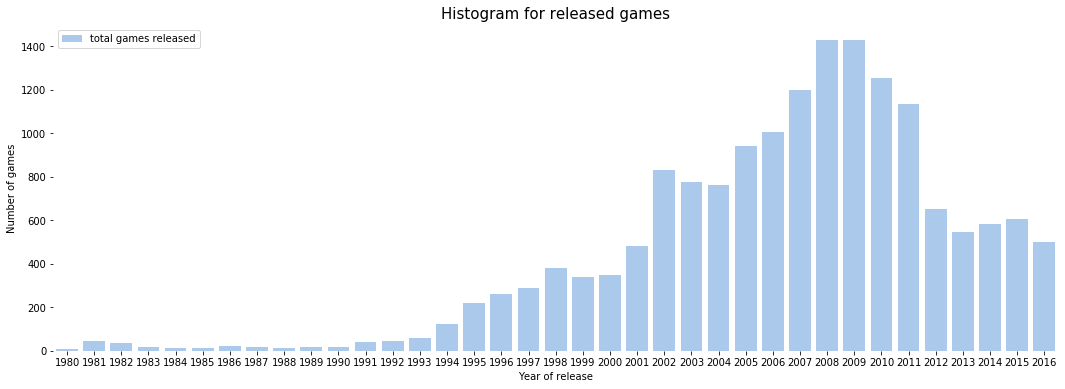

In [41]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(18, 6))

sns.set_color_codes("pastel")
sns.barplot(x="year", y="num_of_games", data=year,
            label="total games released", color="b")

ax.set_title('Histogram for released games', fontdict={'size': 15})
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set( ylabel="Number of games",
       xlabel="Year of release")
sns.despine(left=True, bottom=True)


Starting 1995 the world of games began to grow. Sales peak occurs at 2008-2009'YY.

>Look at how sales varied from platform to platform. 
Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
Find platforms that used to be popular but now have zero sales. 
How long does it generally take for new platforms to appear and old ones to fade?

Grouping the data by platform to get the total sales accumulated for each of them.

In [42]:
df_sales = df[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()

In [43]:
df_sales.head()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42


In order to determine platforms-"loosers" and platforms-"winners" in frames of the total sales, I'll find Z-value for them (z = (x-μ)/σ) and plot a graph.

In [44]:
df_sales['sales_z'] = (df_sales['total_sales'] - df_sales['total_sales'].mean())/ df_sales['total_sales'].std()

In [45]:
df_sales.tail()

,platform,total_sales,sales_z
26,DS,802.78,1.507310
27,Wii,891.18,1.764321
28,PS3,931.34,1.881081
29,X360,961.24,1.968011
30,PS2,1233.56,2.759744


In [46]:
df_sales['colors'] = ['red' if x<0 else 'green' for x in df_sales['sales_z']]
df_sales.head()

,platform,total_sales,sales_z,colors
0,PCFX,0.03,-0.826577,red
1,GG,0.04,-0.826548,red
2,3DO,0.10,-0.826373,red
3,TG16,0.16,-0.826199,red
4,WS,1.42,-0.822536,red


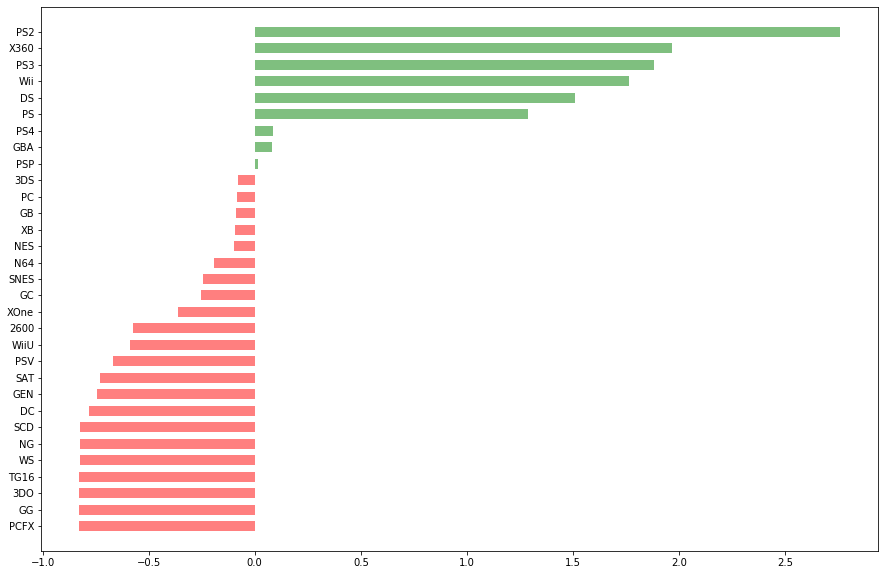

In [47]:
plt.figure(figsize=(15, 10))
plt.hlines(y=df_sales.platform, xmin=0, xmax=df_sales.sales_z, color=df_sales.colors, alpha=0.5, linewidth=10)

Thanks to the visualization of calculated Z-value, I got a list of platforms-"winners": PS2, X360, PS3, Wii, DS, PS4, GBA, and PSP.

Important to notice that in this list got ALL platforms that were released starting the 1980'Y and some of them could be outdated today.

Next step is to get revenue distribution by platfoms.

For this puprose I'll build a squarify plot.

In [48]:
df_tree = df_sales[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales').reset_index()
df_tree = df_tree[df_tree['total_sales']!=0]
df_tree.head()

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42


In [49]:
sizes = df_tree.total_sales.tolist()

In [50]:
labels = df_tree.apply(lambda x: str(x[0])+'\n'+'$'+ str(round(x[1])),axis=1)

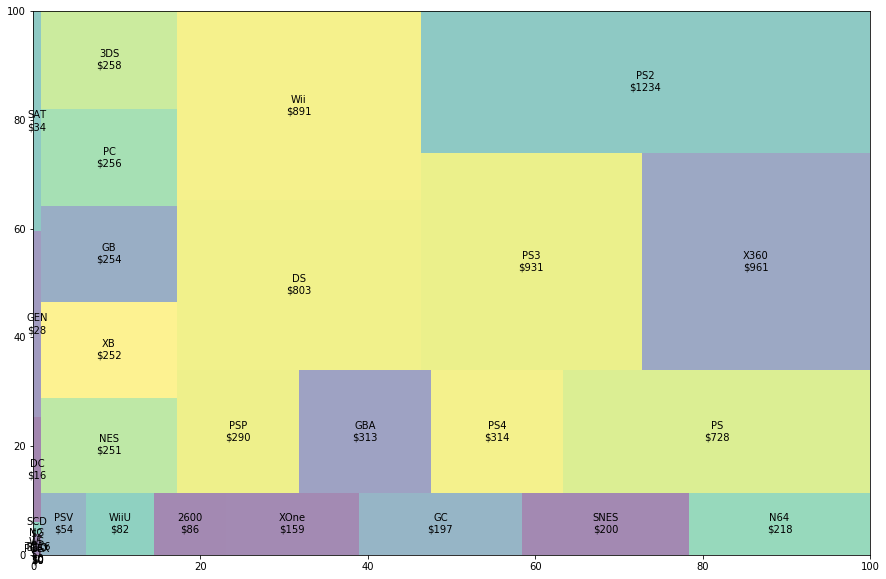

In [51]:
plt.figure(figsize=(15, 10))
squarify.plot(sizes=sizes, label=labels, alpha=.5)

Again it is clearly that PS2, X360, PS3, Wii and DS are the leaders.

Next steps are:

find platforms that used to be popular but now have zero sales.

and

how long does it generally take for new platforms to appear and old ones to fade?

I'll sort platforms by total_sales and get the first 10 with the greatest revenue.

After that I'll build a plot to see when the game was released and when the sales decreased.

In [52]:
platform = df.pivot_table(index = ['platform'], values= 'total_sales', aggfunc='sum').reset_index().sort_values("total_sales", ascending=False)
top_10_plarform = platform.head(10)
top_10_plarform

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [53]:
list_top_platforms = top_10_plarform['platform'].tolist()
list_top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [54]:
df_top_platform = df.query('platform in @list_top_platforms')
df_top_platform['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
GBA      811
3DS      512
PS4      392
Name: platform, dtype: int64

In [55]:
df_top_platform_pivot = df_top_platform.pivot_table(index = ['platform','year_of_release' ], values = 'total_sales', aggfunc = 'sum').reset_index()
df_top_platform_pivot

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
92,X360,2012,99.74
93,X360,2013,88.58
94,X360,2014,34.74
95,X360,2015,11.96


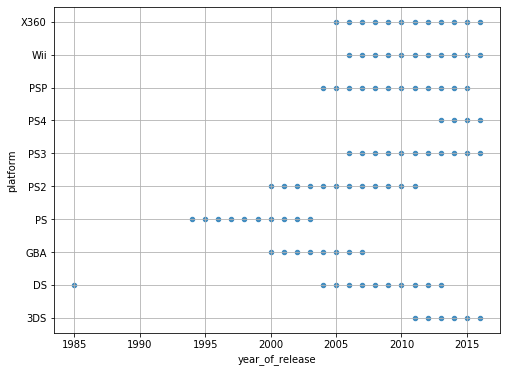

In [56]:
df_top_platform_pivot.plot(x='year_of_release', y='platform', kind='scatter', alpha=0.8, grid=True, figsize=(8,6))

The graph above is a simple visualization of the lifecycle of the popular platforms. We see when the sales for each of them started and when they stopped.

For example, PS2 was popular during 1994 - 2003. PSP is no longer popular after 2015.

X360, Wii, PS3, and PS4 are still on the market.

For better visualization of platforms' lifecycles, I'll create 2 plots, which will show the peaks and drops of platforms popularity.

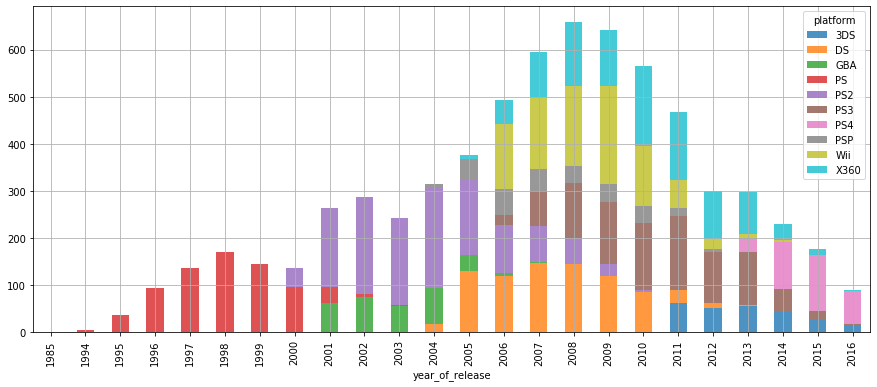

In [57]:
df1 = df_top_platform.pivot_table(index=df['year_of_release'], 
                     columns='platform', 
                     values='total_sales', 
                     aggfunc='sum').plot(kind='bar', stacked=True, alpha=0.8, grid=True, figsize=(15,6))

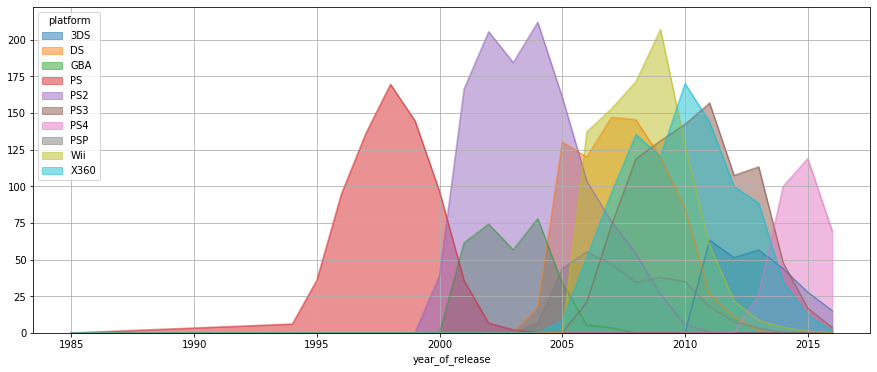

In [58]:
df1 = df_top_platform.pivot_table(index=df['year_of_release'], 
                     columns='platform', 
                     values='total_sales', 
                     aggfunc='sum').plot(kind='area', stacked=False, alpha=0.5, grid=True, figsize=(15,6))

According to the graph it takes about 10 years for life cycle of a platform: to become popular and to fade.

We also see that after 2015 there no any 'uprising' platforms.

>Determine what period you should take data for. 
To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

As I'm bulding the forecast for 2017'Y I want to take the period, that includes only popular or potential for popular platforms.

As I already found, I need a period around 10 previous years. But as I want to exclude the platforms, which may already loosing their poplularity, I'll take for analysis the five last years. 2016-5=2001. It means that I'll work with year_of_release >2000.

Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [59]:
new_df = df.query('year_of_release >2000')
new_df.sort_values(by='total_sales')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14120 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14120 non-null  object 
 1   platform         14120 non-null  object 
 2   year_of_release  14120 non-null  int32  
 3   genre            14120 non-null  object 
 4   na_sales         14120 non-null  float64
 5   eu_sales         14120 non-null  float64
 6   jp_sales         14120 non-null  float64
 7   other_sales      14120 non-null  float64
 8   critic_score     14120 non-null  float64
 9   user_score       14120 non-null  float64
 10  rating           9515 non-null   object 
 11  total_sales      14120 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.3+ MB


>Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In order to get the sales changing trend per each platform, I'll calculate the difference between current and previous years for each row.

In [60]:
data = pd.pivot_table(new_df, index='year_of_release', columns='platform', values='total_sales', aggfunc=sum, fill_value=0)
data.head()

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2001,0.0,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.0,0.0,0.00,0.0,0.28,0.0,0.0,0.00,22.26,0.0
2002,0.0,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,48.01,0.0
2003,0.0,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,55.04,0.0
2004,0.0,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.0,0.0,7.06,0.0,0.00,0.0,0.0,0.00,65.42,0.0
2005,0.0,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.0,0.0,43.84,0.0,0.00,0.0,0.0,8.25,49.08,0.0


In [61]:
dynamics = data - data.shift(+1)
dynamics.tail()

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2012,-11.84,0.0,-15.17,0.0,0.0,0.0,0.0,-11.81,0.0,-0.45,-49.42,0.00,-10.13,11.56,0.0,-37.94,17.56,-44.10,0.0,0.00
2013,5.21,0.0,-9.47,0.0,0.0,0.0,0.0,-10.84,0.0,0.00,5.89,25.99,-4.55,-5.60,0.0,-13.12,4.09,-11.16,0.0,18.96
2014,-12.81,0.0,-1.54,0.0,0.0,0.0,0.0,0.90,0.0,0.00,-65.49,74.01,-2.90,1.31,0.0,-4.84,0.38,-53.84,0.0,35.11
2015,-15.98,0.0,0.00,0.0,0.0,0.0,0.0,-4.76,0.0,0.00,-30.94,18.90,-0.12,-5.65,0.0,-2.61,-5.68,-22.78,0.0,6.07
2016,-12.64,0.0,0.00,0.0,0.0,0.0,0.0,-3.27,0.0,0.00,-13.22,-49.65,-0.12,-2.00,0.0,-0.96,-11.75,-10.44,0.0,-33.99


Building the heatmap to show the life-cycles of platforms, released after 2000'Y. The red cells point on sales peaks, the dark blue - on sales drops, and the light blue on the absence of sales during those periods.

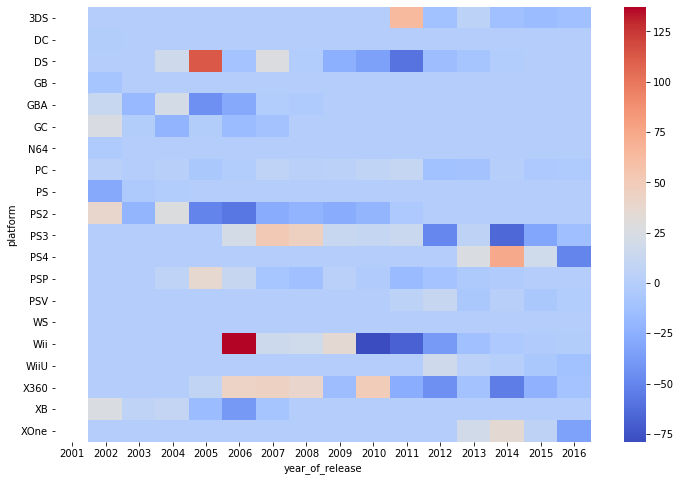

In [62]:
plt.figure(figsize=(12, 8))
sns.heatmap(dynamics.T, cmap ='coolwarm')

The graph shows that DS platform was very poplular during 2005-2006 and Wii during 2006-2007. PS4 was popular on 2014 and X360 have managed to hold it's popularity during long period: 2006 - 2010.

>Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [63]:
grouped = new_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
grouped.head()

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78


In [64]:
ordered = grouped.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).reset_index()['platform']
ordered

0      PS2
1     X360
2      PS3
3      Wii
4       DS
5      PS4
6      GBA
7      PSP
8      3DS
9       XB
10      PC
11      GC
12    XOne
13    WiiU
14     PSV
15      PS
16      GB
17     N64
18      DC
19      WS
Name: platform, dtype: object

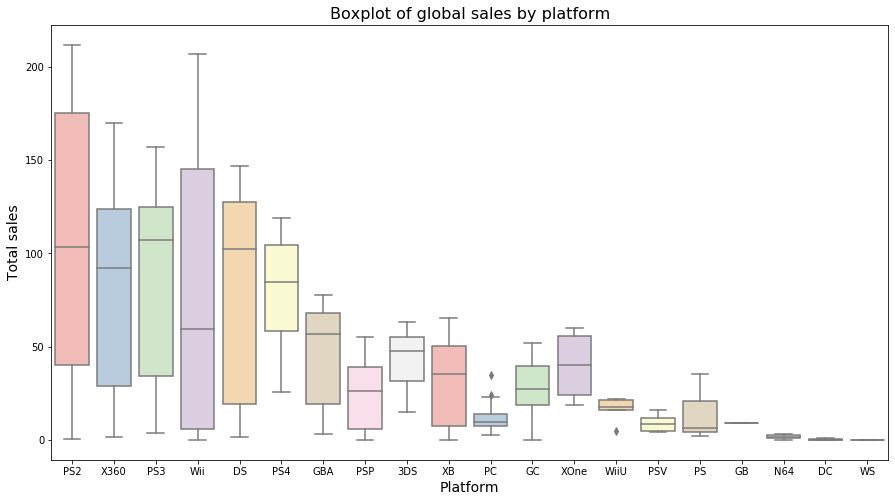

In [65]:
plt.figure(figsize=(15, 8))
bplot = sns.boxplot(y='total_sales', x='platform', data=grouped, order=ordered, palette='Pastel1')

bplot.axes.set_title("Boxplot of global sales by platform",
                    fontsize=16)
 
bplot.set_xlabel("Platform", 
                fontsize=14)
 
bplot.set_ylabel("Total sales",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

Conclusion: we have 6 leaders with greatest sales since 2000:

- PS2
- X360
- PS3
- Wii
- DS
- PS4

Other platforms are clearly losing their positions in comparison with them.

With regards to the average sales, the boxplots show, that PS3, X360, and PS3 have the highest average sales among all list.

>Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

I choose the PS2, as the most popular platform since 2000'Y.

In [66]:
new_df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


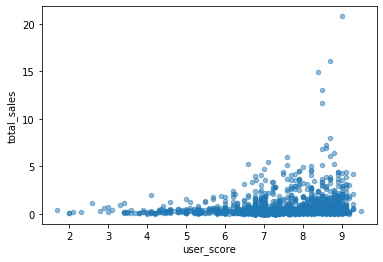

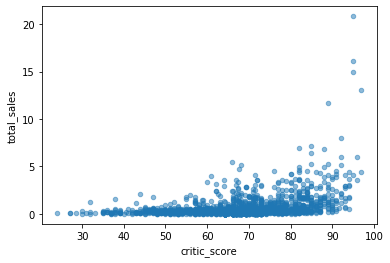

In [67]:
#dependency of platform sales on user reviews
PS2 = new_df.query(' platform == "PS2"')
PS2_user = PS2.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
PS2_critic = PS2.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)

In [68]:
PS2_stat = PS2.pivot_table(index='total_sales', values=['user_score','critic_score']).reset_index()
PS2_stat.head()

,total_sales,critic_score,user_score
0,0.00,67.614040,7.002402
1,0.01,65.718723,7.084617
2,0.02,64.173921,7.069038
3,0.03,64.790464,7.139623
4,0.04,68.075673,7.167483


In [69]:
#Pearson correlation coefficient
PS2_stat.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.511220,0.292031
critic_score,0.511220,1.000000,0.645837
user_score,0.292031,0.645837,1.000000


The critic score and the user score have direct correlation with total sales of the platform. The critic score has even more stronger correlation than the user score.

>Keeping your conclusions in mind, compare the sales of the same games on other platforms.

I'll choose 5 other poplular platform in the list and check the conslusion for all of them as well.
These platforms are: PS3, X360, Wii, DS and PS4.

In [70]:
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,67.386553,7.234217,NaN,40.24


In [71]:
Popular_platforms = new_df.query(' platform in ("PS3", "X360", "Wii", "DS", "PS4" )')
Popular_stat = Popular_platforms.pivot_table(index='total_sales', values=['user_score','critic_score']).reset_index()
Popular_stat.tail()

,total_sales,critic_score,user_score
690,28.91,58.0,6.6
691,29.80,89.0,8.5
692,32.77,80.0,8.0
693,35.52,82.0,8.3
694,82.54,76.0,8.0


In [72]:
#Pearson correlation coefficient
Popular_stat.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.257634,0.107820
critic_score,0.257634,1.000000,0.434246
user_score,0.107820,0.434246,1.000000


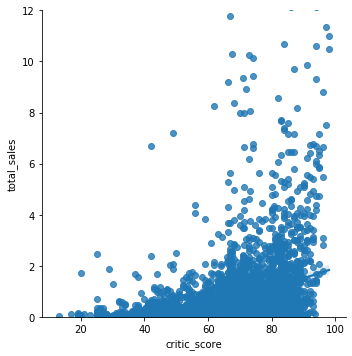

In [73]:
scatter = sns.lmplot(x='critic_score', y='total_sales', data=Popular_platforms)
scatter.set(ylim=(0, 12))

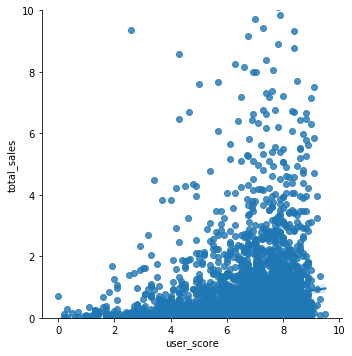

In [74]:
scatter = sns.lmplot(x='user_score', y='total_sales', data=Popular_platforms)
scatter.set(ylim=(0, 10))

After checking the other popular platfroms I got the confirmation of previous findings: critic score and user score have direct correlation with the sales.

>Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

I'll update the new dataframe, adding PS2 to the query with other poplular platforms. Arter, create a pivot, grouped by genre and platform.

In [75]:
Popular_platforms_upd = new_df.query(' platform in ("PS2","PS3", "X360", "Wii", "DS", "PS4" )')

In [76]:
genre = Popular_platforms_upd\
.pivot_table(index=['genre', 'platform'], values=['na_sales','eu_sales','jp_sales' ,'total_sales' ], aggfunc=sum).reset_index()\
.sort_values(by='total_sales', ascending=False)

In [77]:
genre

,genre,platform,eu_sales,jp_sales,na_sales,total_sales
2,Action,PS3,104.69,29.01,120.13,297.87
64,Sports,Wii,93.67,18.25,147.92,286.49
53,Shooter,X360,74.28,3.05,173.66,275.62
1,Action,PS2,70.66,24.09,126.85,268.99
61,Sports,PS2,64.39,22.08,124.40,253.16
...,...,...,...,...,...,...
57,Simulation,PS4,0.68,0.18,0.21,1.23
35,Puzzle,X360,0.04,0.15,0.49,0.73
69,Strategy,PS4,0.21,0.16,0.17,0.62
32,Puzzle,PS3,0.04,0.10,0.26,0.44


Building a plot to get a visual distribution of total sales by genre and platform.

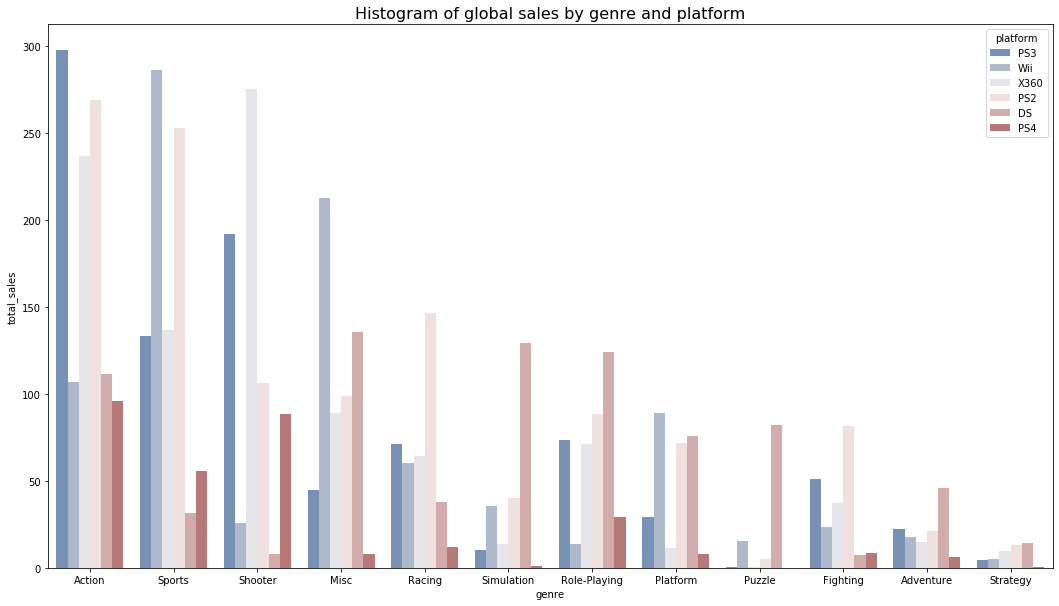

In [78]:
plt.figure(figsize=(18, 10))
plot = sns.barplot(x="genre", y="total_sales", hue="platform", data=genre, palette='vlag')

plot.axes.set_title("Histogram of global sales by genre and platform",
                    fontsize=16)
 
bplot.set_xlabel("Platform", 
                fontsize=14)
 
bplot.set_ylabel("Total sales",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

According to the graph, the 3 most popular genres are action, sport and shooter. The popularity of platforms vary from genre to genre, but main leaders are: PS3, Wii, X360 and PS2.

Next step, I'll build the plot of genre poplularity, without division by platforms.

In [79]:
#creating ordered list
ordered_2 = Popular_platforms_upd.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False).reset_index()
ordered_2

,genre,total_sales
0,Action,1117.63
1,Sports,896.37
2,Shooter,696.38
3,Misc,588.88
4,Role-Playing,400.35
5,Racing,392.53
6,Platform,284.72
7,Simulation,230.55
8,Fighting,208.83
9,Adventure,128.13


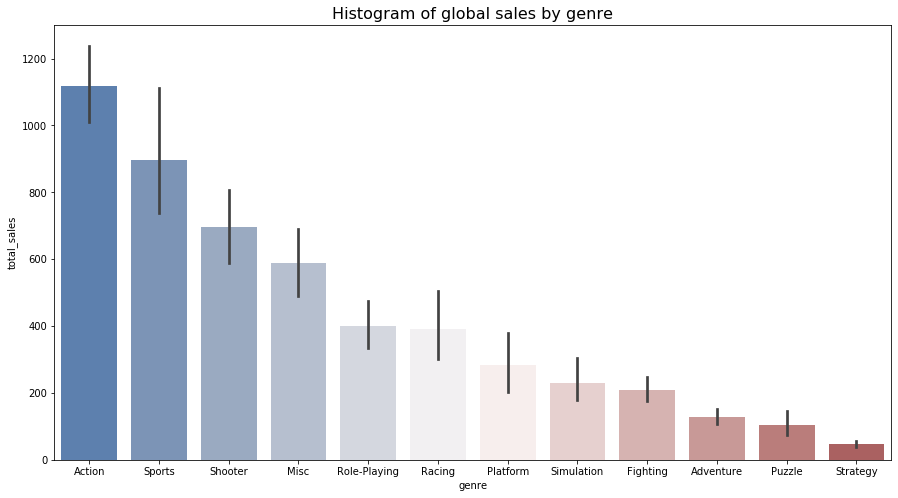

In [80]:
plt.figure(figsize=(15, 8))
plot = sns.barplot(x="genre", y="total_sales", data=Popular_platforms_upd, order=ordered_2['genre'], palette='vlag', estimator=sum)

plot.axes.set_title("Histogram of global sales by genre",
                    fontsize=16)
 
bplot.set_xlabel("Genre", 
                fontsize=14)
 
bplot.set_ylabel("Total sales",
                fontsize=14)
 
bplot.tick_params(labelsize=10)

I'll also build a distribution of genres by different regions to get the full picture.

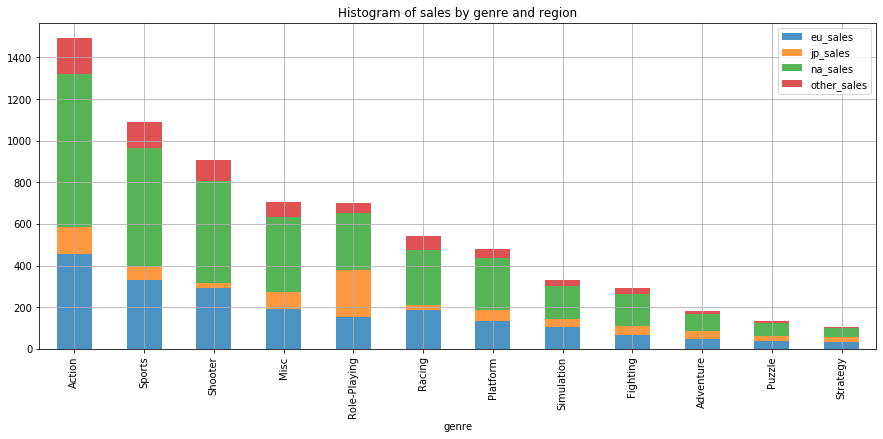

In [81]:
location = new_df.pivot_table(index=df['genre'], 
                     values=['other_sales','eu_sales','jp_sales', 'na_sales'],
                     aggfunc='sum').sort_values(by='na_sales', ascending=False)

location.plot(kind='bar', stacked=True, alpha=0.8, grid=True, figsize=(15,6), title='Histogram of sales by genre and region')


Conclusion: The most popular genres are: action, sports, shooter, misc, and role-playing. The most popular platforms are PS2, PS3, X360, Wii and DS. The biggest consumers are in North America and in Europe. 

The interesting insight that despite the fact that genres are almost equally spread between all presented regions, such genre as Shooter is less popular in Japan than Role-Playing.

**Step 4. Create a user profile for each region**

>For each region (NA, EU, JP), determine:
The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

In [82]:
new_df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


Analysis for The top five platforms

In [83]:
#top 5 in Total Sales
top_5_platforms = ordered.head(5)
top_5_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
Name: platform, dtype: object

In [84]:
#top 5 by region
grouped_region = new_df \
.pivot_table(index=['platform'], values =['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc=sum)\
.reset_index().sort_values(by='total_sales', ascending=False)
top_5_platforms_region = grouped_region.head(5)
top_5_platforms_region

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
9,PS2,321.99,128.67,556.84,186.89,1194.39
17,X360,268.32,12.30,595.74,84.88,961.24
10,PS3,327.21,79.41,390.13,134.59,931.34
15,Wii,258.32,68.28,486.87,77.71,891.18
2,DS,188.41,175.00,380.31,59.04,802.76


In [85]:
top_5_platforms_region.platform

9      PS2
17    X360
10     PS3
15     Wii
2       DS
Name: platform, dtype: object

Below I'll build 2type of graphs: bar plots and pie chart.

For the purpose of bar plots - create a visualization of platforms divided in descending order by sales and get a clear view of leaders in sales and differences in total amounts.

The purpose of the pie chart is a better visualization of market share.

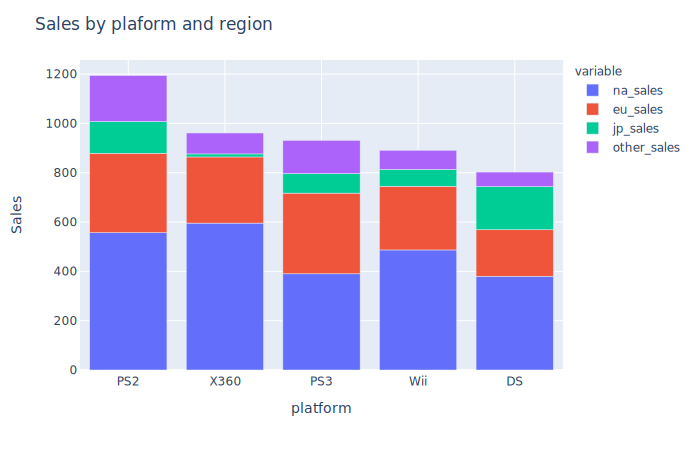

In [86]:
fig = go.Figure()
fig = px.bar(top_5_platforms_region, x="platform", y=["na_sales", "eu_sales", "jp_sales", "other_sales"])
fig.update_layout(title_text='Sales by plaform and region', yaxis=dict(
        title='Sales'))


PS 2 is a leader of total sales and presented in all locations. X360 is not popular in Japan, but more poplular in North America than the rest of the other platforms.

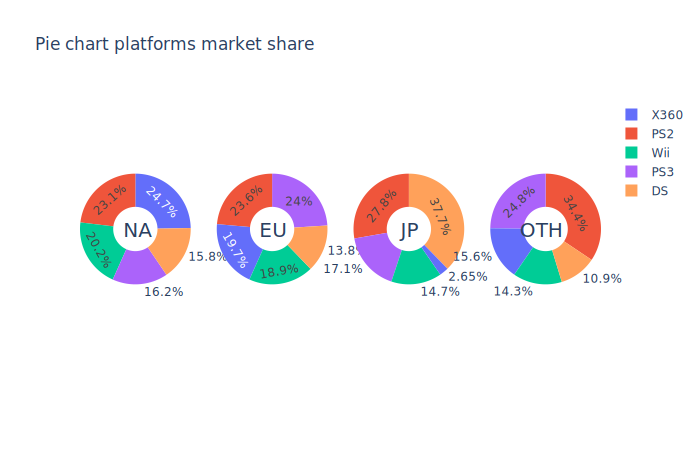

In [87]:
labels = top_5_platforms_region['platform']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=4,
                   specs=[[{'type':'domain'}, {'type':'domain'},
                           {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=top_5_platforms_region['na_sales'], name="na_sales"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=top_5_platforms_region['eu_sales'], name="eu_sales"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=top_5_platforms_region['jp_sales'], name="jp_sales"),
              1, 3)
fig.add_trace(go.Pie(labels=labels, values=top_5_platforms_region['other_sales'], name="other_sales"),
              1, 4)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart platforms market share",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='NA', x=0.08, y=0.5, font_size=20, showarrow=False),
                 dict(text='EU', x=0.37, y=0.5, font_size=20, showarrow=False),
                dict(text='JP', x=0.63, y=0.5, font_size=20, showarrow=False),
                dict(text='OTH', x=0.93, y=0.5, font_size=20, showarrow=False)])
fig.show()


>Describe variations in their market shares from region to region.

- North America gives preference to X360, PS2, and Wii, the PS3 and DS get 16.2% and 15.8% of market share respectively.
- Europe: has 2 leaders PS2 and PS3, the X360, Wii, and DS get less than 20% share each.
- Japan: has one leader: DS, the second place with a lag of 10% gets PS2. Unlike other regions, Japan almost don't consume the X360. The % of the market share for this platform only 2.65%
- Other regions: the market winner is PS2 34.4%. Second place PS3 24.8%. The less consumed platform is DS 10.9%.



The top five genres

In [88]:
#top 5 in Total Sales
top_5_genres = ordered_2['genre'].head(5)
top_5_genres

0          Action
1          Sports
2         Shooter
3            Misc
4    Role-Playing
Name: genre, dtype: object

In [89]:
#top 5 by region
grouped_genre = new_df \
.pivot_table(index=['genre'], values =['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc=sum)\
.reset_index().sort_values(by='total_sales', ascending=False)
top_5_genres_region = grouped_genre.head(5)
top_5_genres_region

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,455.74,128.49,734.48,173.47,1492.18
10,Sports,329.81,69.52,566.64,123.71,1089.68
8,Shooter,291.85,23.08,491.23,99.71,905.87
3,Misc,191.80,82.66,358.13,70.21,702.80
7,Role-Playing,151.48,225.91,275.10,49.68,702.17


In [90]:
top_5_genres_region.genre

0           Action
10          Sports
8          Shooter
3             Misc
7     Role-Playing
Name: genre, dtype: object

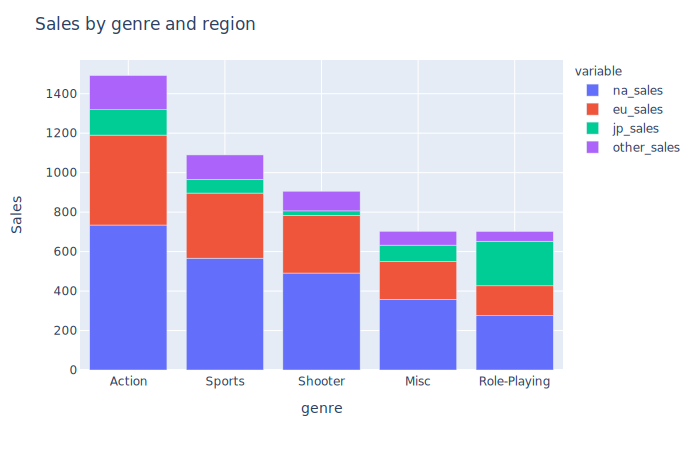

In [91]:
fig = go.Figure()
fig = px.bar(top_5_genres_region, x="genre", y=["na_sales", "eu_sales", "jp_sales", "other_sales"])
fig.update_layout(title_text='Sales by genre and region', yaxis=dict(
        title='Sales'))

Genre Action is a leader of total sales and presented in all locations. Shooter is not popular in Japan. Role-Playing is the less popular genre in the top 5 popular ones, but it is also the most consumed genre in Japan.

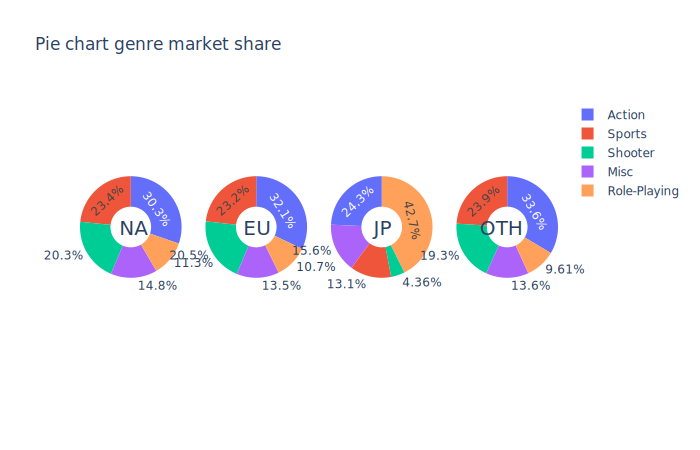

In [92]:
labels = top_5_genres_region['genre']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=4,
                   specs=[[{'type':'domain'}, {'type':'domain'},
                           {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels, values=top_5_genres_region['na_sales'], name="na_sales"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=top_5_genres_region['eu_sales'], name="eu_sales"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values=top_5_genres_region['jp_sales'], name="jp_sales"),
              1, 3)
fig.add_trace(go.Pie(labels=labels, values=top_5_genres_region['other_sales'], name="other_sales"),
              1, 4)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart genre market share",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='NA', x=0.08, y=0.5, font_size=20, showarrow=False),
                 dict(text='EU', x=0.37, y=0.5, font_size=20, showarrow=False),
                dict(text='JP', x=0.63, y=0.5, font_size=20, showarrow=False),
                dict(text='OTH', x=0.93, y=0.5, font_size=20, showarrow=False)])
fig.show()

> Describe variations in market shares from region to region.

- North America gives preference to Action, Sports, and Shooter, the Misc and Role-Playing get 14.8% and 11.3% of market share respectively.
- Europe: has 1 leader Action with 32.1% of market share, the Sports 23.2%, and Shooter 20.5% share second place. The less popular genre is Role-Playing.
- Japan: has one leader: Role-Playing, the second place with a lag of 18% gets Action. Japan almost don't consume Shooter. The % of the market share for this platform only 4.36%
- Other regions: the market winner is Action 33.6%. Second place Sports 23.9%. The less consumed platform is Role-Playing 9.61%.

>Explain the difference

As we saw on the Histogram of global sales by genre and platform, the X360 the most popular platform for genre shooters. As Japan consumers don't find this genre amusing, it also affects the sales of the platform.

The same works for DS platform. it is a popular platform for Role-Playing genre. With the increasing popularity of this genre in Japan, increased sales od the platform.

North America, Europe and mix of other countries have the same preferences in genres, where leaders Action, Sports and Shooter, which affect the increase of sales for such platforms as PS2, PS3, X360 and Wii.


>Do ESRB ratings affect sales in individual regions?

In [93]:
grouped_rating = new_df \
.pivot_table(index=['rating'], values =['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc=sum)\
.reset_index().sort_values(by='total_sales', ascending=False)
grouped_rating

,rating,eu_sales,jp_sales,na_sales,other_sales,total_sales
1,E,675.38,187.27,1225.21,226.14,2314.00
4,M,470.66,57.16,725.87,173.90,1427.59
6,T,379.12,122.63,689.03,145.17,1335.95
2,E10+,183.33,40.20,345.50,71.92,640.95
0,AO,0.61,0.00,1.26,0.09,1.96
3,EC,0.11,0.00,1.53,0.11,1.75
5,RP,0.03,0.00,0.00,0.01,0.04


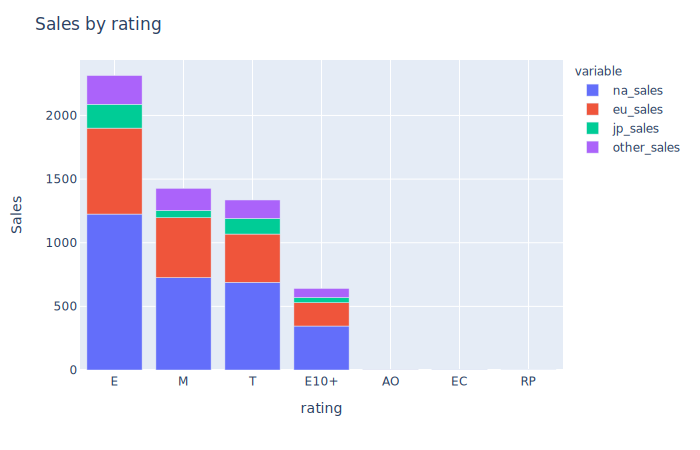

In [94]:
fig = go.Figure()
fig = px.bar(grouped_rating, x="rating", y=["na_sales", "eu_sales", "jp_sales", "other_sales"])
fig.update_layout(title_text='Sales by rating', yaxis=dict(
        title='Sales'))

E and T ratings equally popular across all regions. The market share for E rating leads among others with a big lag.
Japan is not a big fan of games with M rating.

Such ratings as AO, EC, and RP are not popular comparing with others. They are not even visual on the graph.

**Step 5. Test the following hypotheses:**

> 
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

>Set the alpha threshold value yourself.
Explain:

- How you formulated the null and alternative hypotheses
- What significance level you chose to test the hypotheses, and why

We have two data sets: user ratings of the Xbox One user ratings of the PC platform.

I'll test the hypothesis on the equality of 2 population means.

The Null hypothesis (H0) is that the average user ratings of the Xbox One and PC platforms are the same.

The Alternative hypothesis (H1) is that the average user ratings of the Xbox One and PC platforms are different.

Let the significance level be 0.05.

In [95]:
new_df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


In [96]:
df_xbox1 = new_df.query('platform == "XOne"')
df_PC = new_df.query('platform == "PC"')

user_rating_xbox = df_xbox1.pivot_table(index=['year_of_release', 'platform'], values=['user_score']).reset_index()
user_rating_pc = df_PC.pivot_table(index=['year_of_release', 'platform'], values=['user_score']).reset_index()

In [97]:
user_rating_xbox

,year_of_release,platform,user_score
0,2013,XOne,5.957632
1,2014,XOne,6.815014
2,2015,XOne,6.629823
3,2016,XOne,6.747959


In [98]:
user_rating_pc

,year_of_release,platform,user_score
0,2001,PC,8.076173
1,2002,PC,8.144159
2,2003,PC,8.077503
3,2004,PC,7.676266
4,2005,PC,7.883927
5,2006,PC,7.598681
6,2007,PC,7.205217
7,2008,PC,7.221514
8,2009,PC,7.231478
9,2010,PC,6.900180


In [99]:
xbox_avg = user_rating_xbox['user_score']
pc_avg = user_rating_pc['user_score']

In [100]:
alpha = 0.05 

results = st.ttest_ind(
        xbox_avg, 
        pc_avg)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.07514794355090094
We can't reject the null hypothesis


In addition to hypothesis testing I'll bulid a density histograms for both platforms to compare them visually.

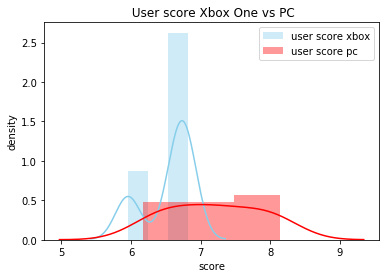

In [101]:
sns.distplot(xbox_avg, color="skyblue", label="user score xbox")
sns.distplot(pc_avg, color="red", label="user score pc")
plt.title(' User score Xbox One vs PC')
plt.xlabel('score')
plt.ylabel('density')
plt.legend()


- Average user ratings for the Action and Sports genres are different.

We have two data sets: user ratings for the Action and user ratings of the Sports genres.

I'll test the hypothesis on the difference of 2 population means.

The Null hypothesis (H0) is that the average user ratings of the Action and Sports are the same.

The Alternative hypothesis (H1) is that the average user ratings of the Action and Sports are different. 
In case the result will be " can reject the H0", we can assume that user ratings for the Action and Sports genres are different.

Let the significance level be 0.05.

In [102]:
df_action = new_df.query('genre == "Action"')
df_sport = new_df.query('genre == "Sports"')

user_rating_action = df_action.pivot_table(index=['year_of_release', 'genre'], values=['user_score']).reset_index()
user_rating_sports = df_sport.pivot_table(index=['year_of_release', 'genre'], values=['user_score']).reset_index()

In [103]:
user_rating_action

,year_of_release,genre,user_score
0,2001,Action,7.171768
1,2002,Action,7.369057
2,2003,Action,7.318947
3,2004,Action,7.397799
4,2005,Action,7.460375
5,2006,Action,7.234894
6,2007,Action,6.755730
7,2008,Action,7.076244
8,2009,Action,6.895642
9,2010,Action,6.873016


In [104]:
user_rating_sports

,year_of_release,genre,user_score
0,2001,Sports,7.384244
1,2002,Sports,7.477151
2,2003,Sports,7.866950
3,2004,Sports,7.831122
4,2005,Sports,7.383271
5,2006,Sports,7.048890
6,2007,Sports,6.759841
7,2008,Sports,6.768228
8,2009,Sports,6.919341
9,2010,Sports,6.830130


In [105]:
action_avg = user_rating_action['user_score']
sports_avg = user_rating_sports['user_score']

In [106]:
alpha = 0.05 

results = st.ttest_ind(
        action_avg, 
        sports_avg)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.12706267952493525
We can't reject the null hypothesis


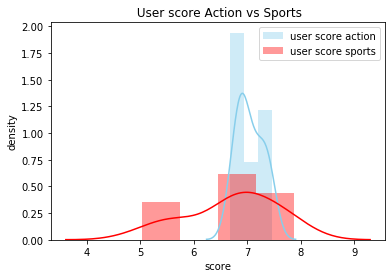

In [107]:
sns.distplot(action_avg, color="skyblue", label="user score action")
sns.distplot(sports_avg, color="red", label="user score sports")
plt.title(' User score Action vs Sports')
plt.xlabel('score')
plt.ylabel('density')
plt.legend()

We can't reject the Null hypothesis (H0) is that the average user ratings of the Action and Sports are the same.

**Step 6. Write a general conclusion**

The goal of this project is to identify patterns that determine whether a game succeeds or not. And spot potential big winners.

After thoughtful analysis I would recommend to managers to:

1. Target marketing campaigns by region. The charts showed that users from different regions prefer different genres. For NA and Europe, I'd advertised Action, Sports, and Shooter. For Japan Role_Playing. 

2. The same with platforms. As they support different genres, I'd make more aggressive advertisements of DS in Japan and of PS2, PS3, and X360 in NA and Europe.

3. With regard to the rating, I'd recommend going with E, as it is a sure winner for all regions.
